In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

os.listdir( '../../All_data_sets/dl/' )

['.ipynb_checkpoints', 'Churn_Modelling.csv', 'heart.csv']

In [3]:
# Load dataset
url = '../../All_data_sets/dl/heart.csv'
data = pd.read_csv(url)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106.0,0,1.9,1,3,2,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
data.shape

(1025, 14)

In [7]:
data.dropna(inplace=True)

data.shape

(1023, 14)

In [8]:
# Separate features and target
X = data.drop('target', axis=1).values
y = data['target'].values

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Build ANN model
model = Sequential()

# add the input layer and 1st hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Hidden layer 1
model.add(Dropout(0.3))  # Drops 30% of neurons

model.add(Dense(32, activation='relu'))  # Hidden layer 2
model.add(Dropout(0.3))  # Drops 30% of neurons

model.add(Dense(16, activation='relu'))  # Hidden layer 3
model.add(Dropout(0.3))  # Drops 30% of neurons

model.add(Dense(1, activation='sigmoid'))  # Output layer

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    X_train, y_train,
    
    validation_split=0.2,
    
    epochs=100,
    
    batch_size=32,
    
    callbacks=[early_stop]  # Add EarlyStopping here
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5510 - loss: 0.6931 - val_accuracy: 0.7195 - val_loss: 0.6193
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6167 - loss: 0.6407 - val_accuracy: 0.8293 - val_loss: 0.5604
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6893 - loss: 0.5648 - val_accuracy: 0.8232 - val_loss: 0.4877
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7639 - loss: 0.5028 - val_accuracy: 0.8110 - val_loss: 0.4299
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8001 - loss: 0.4588 - val_accuracy: 0.8476 - val_loss: 0.3940
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8162 - loss: 0.4074 - val_accuracy: 0.8537 - val_loss: 0.3786
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8268 - loss: 0.3985 - val_accuracy: 0.8598 - val_loss: 0.3620
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8213 - loss: 0.4149 - val_accuracy: 0.8780 -

In [22]:
history.history

{'accuracy': [0.5519877672195435,
  0.6529052257537842,
  0.7155963182449341,
  0.7782874703407288,
  0.781345546245575,
  0.819571852684021,
  0.8318042755126953,
  0.8394495248794556,
  0.8425076603889465,
  0.8425076603889465,
  0.853210985660553,
  0.8792048692703247,
  0.8746177554130554,
  0.8746177554130554,
  0.8669725060462952,
  0.8792048692703247,
  0.8730886578559875,
  0.8883792161941528,
  0.8822630047798157,
  0.8868501782417297,
  0.8929663896560669,
  0.89449542760849,
  0.9036697149276733,
  0.9051987528800964,
  0.8868501782417297,
  0.8837920427322388,
  0.9143730998039246,
  0.9204893112182617,
  0.9128440618515015,
  0.9220183491706848,
  0.9097859263420105,
  0.9113149642944336,
  0.8975535035133362,
  0.9006116390228271,
  0.9143730998039246,
  0.9342507719993591,
  0.9113149642944336,
  0.9174311757087708,
  0.928134560585022,
  0.9128440618515015,
  0.9189602732658386,
  0.9220183491706848,
  0.9097859263420105,
  0.9266055226325989,
  0.9204893112182617,
  0.

In [17]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9084 - loss: 0.1940 
Test Accuracy: 93.17%


In [18]:
len( history.history['accuracy'] )

65

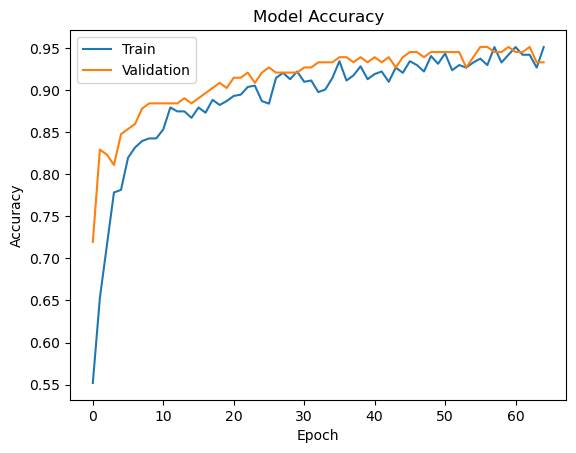

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

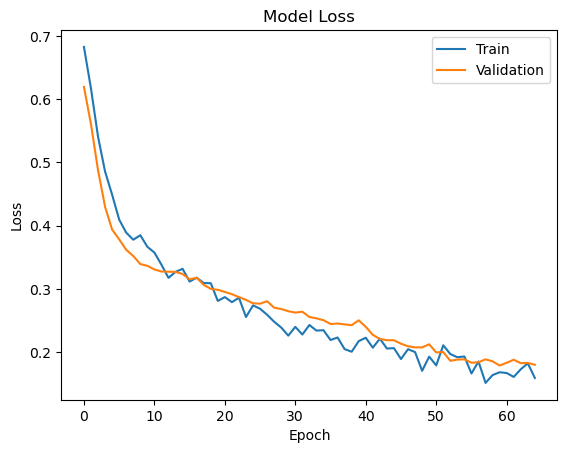

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()